<a href="https://colab.research.google.com/github/arjunarora1201/Advanced-Python-Assignment/blob/main/AdvancePythonAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Process Automation**

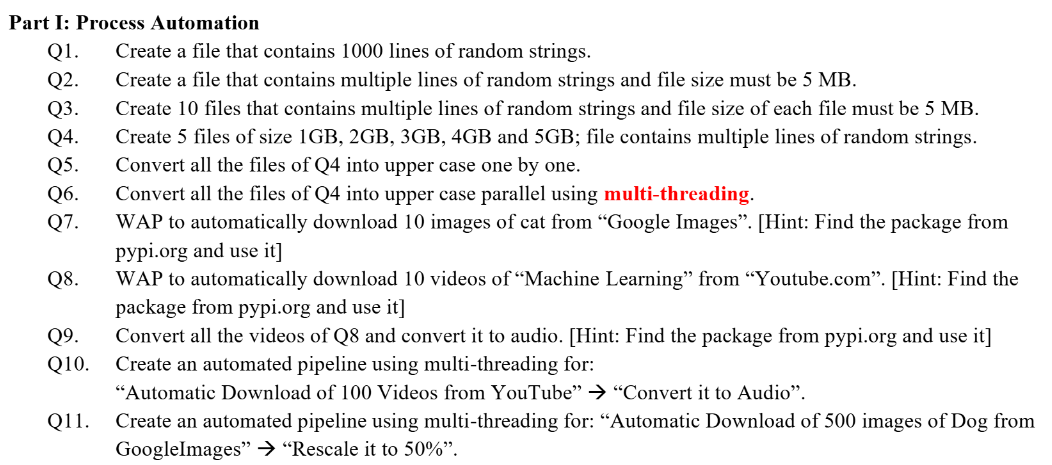

In [13]:
import random as r
import string as s

def random_string_generator(length = 10):
  characters = s.ascii_letters + s.digits
  return ''.join(r.choice(characters) for _ in range(length))

fp = open('/content/randomStrings.txt','w')
for i in range(1000):
  fp.write(random_string_generator(r.randint(1,100)) + '\n')
fp.close()

In [14]:
import os

def generate_file(target_size=5*1024*1024):
    chars = s.ascii_letters + s.digits + s.punctuation
    with open('random_5mb.txt', 'w') as f:
        while os.path.getsize('random_5mb.txt') < target_size:
            f.write(''.join(r.choice(chars) for _ in range(r.randint(1,100))) + '\n')

generate_file()

In [15]:
def generate_file(file_num, target_size=5*1024*1024):
    chars = s.ascii_letters + s.digits + s.punctuation
    filename = f'random_5mb_{file_num}.txt'
    with open(filename, 'w') as f:
        while os.path.getsize(filename) < target_size:
            f.write(''.join(r.choice(chars) for _ in range(r.randint(1,100))) + '\n')

for i in range(1, 11):
    generate_file(i)
    print(f'Created file {i}')

Created file 1
Created file 2
Created file 3
Created file 4
Created file 5
Created file 6
Created file 7
Created file 8
Created file 9
Created file 10


In [ ]:
def generate_large_file(size_gb, file_num):
    target_size = size_gb * 1024 * 1024 * 1024
    chars = s.ascii_letters + s.digits + s.punctuation
    filename = f'random_{size_gb}gb.txt'

    with open(filename, 'w') as f:
        while os.path.getsize(filename) < target_size:
            f.write(''.join(r.choice(chars) for _ in range(r.randint(1,100))) + '\n')
    print(f'Created {filename}')

sizes = [1, 2, 3, 4, 5]
for i, size in enumerate(sizes, 1):
    generate_large_file(size, i)

In [ ]:
def convert_to_uppercase(filename):
    with open(filename, 'r') as f:
        content = f.read()
    with open(filename, 'w') as f:
        f.write(content.upper())

for size in [1, 2, 3, 4, 5]:
    filename = f'random_{size}gb.txt'
    convert_to_uppercase(filename)
    print(f'Converted {filename} to uppercase')

In [ ]:
import threading

def convert_to_uppercase(filename):
    with open(filename, 'r') as f:
        content = f.read()
    with open(filename, 'w') as f:
        f.write(content.upper())
    print(f'Converted {filename} to uppercase')

threads = []
for size in [1, 2, 3, 4, 5]:
    filename = f'random_{size}gb.txt'
    t = threading.Thread(target=convert_to_uppercase, args=(filename,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

In [ ]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download
response().download('cat', 10)
print("Downloaded 10 cat images")

Downloaded 10 cat images


In [ ]:
!pip install --upgrade pytube
from pytube import YouTube, Search

def download_video(query, index):
    s = Search(query)
    if not s.results:
        print(f"No results found for '{query}'")
        return

    yt = s.results[0]
    os.makedirs('videos', exist_ok=True)

    try:
        stream = yt.streams.get_highest_resolution()
        stream.download(output_path='videos', filename_prefix=f'{index}_')
        print(f'Downloaded video {index}: {yt.title}')
    except Exception as e:
        print(f'Error downloading video {index}: {str(e)}')

for i in range(1, 11):
    download_video('Machine Learning', i)

In [ ]:
from moviepy.editor import VideoFileClip
import os

def convert_to_audio(video_path, audio_path):
  try:
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path)
  except:
    print(f'Error converting {video_path} to audio')

for i in range(1, 11):
    video_file = f'videos/ml_video_{i}.mp4'
    audio_file = f'audio/ml_audio_{i}.mp3'
    convert_to_audio(video_file, audio_file)
    print(f'Converted video {i} to audio')

In [ ]:
from moviepy.editor import VideoFileClip

def process_video(video_num):
    url = f'https://www.youtube.com/watch?v=dQw4w9WgXcQ'
    yt = YouTube(url)
    stream = yt.streams.first()
    video_path = f'downloads/video_{video_num}.mp4'
    stream.download(filename=video_path)

    audio_path = f'audio/audio_{video_num}.mp3'
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path)
    print(f'Processed video {video_num}')

threads = []
for i in range(1, 101):
    t = threading.Thread(target=process_video, args=(i,))
    threads.append(t)
    t.start()
    if len(threads) >= 5:
        for t in threads:
            t.join()
        threads = []

for t in threads:
    t.join()

In [ ]:
from simple_image_download import simple_image_download as simp
from PIL import Image

def download_and_resize(image_num):
    response = simp.simple_image_download
    response().download('dog', 1, extensions={'.jpg'})
    original = f'simple_images/dog/dog_{image_num}.jpg'
    img = Image.open(original)
    w, h = img.size
    img = img.resize((w//2, h//2))
    img.save(f'resized/dog_{image_num}.jpg')
    print(f'Processed image {image_num}')

threads = []
for i in range(1, 501):
    t = threading.Thread(target=download_and_resize, args=(i,))
    threads.append(t)
    t.start()
    if len(threads) >= 10:
        for t in threads:
            t.join()
        threads = []

for t in threads:
    t.join()

**Part 2: Data Analytics**

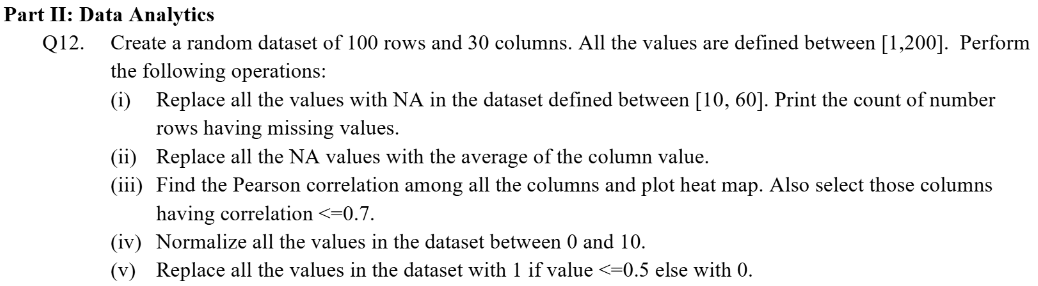

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,110,132,17,94,95,65,105,200,110,87,...,184,87,126,144,41,174,65,44,134,169
1,123,178,29,168,180,7,95,116,99,174,...,85,42,10,20,98,163,194,82,37,26
2,19,80,180,55,21,136,69,31,191,89,...,160,183,15,148,63,181,136,196,30,16
3,139,126,159,2,190,139,103,56,198,68,...,41,60,175,65,100,115,186,84,66,166
4,144,68,151,51,173,91,51,103,91,61,...,40,133,184,154,157,121,193,138,199,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,116,54,157,131,2,74,110,93,146,40,...,164,15,118,157,61,112,29,49,12,147
96,5,154,129,99,121,66,87,150,168,1,...,151,29,67,185,187,96,122,107,127,95
97,131,116,89,163,156,192,171,49,194,186,...,30,11,200,70,8,115,110,12,20,170
98,34,51,24,166,105,23,36,61,163,98,...,90,67,54,197,157,147,145,23,31,169


In [17]:
data[(data >= 10) & (data <= 60)] = np.nan
print(f"Rows with missing values: {data.isna().any(axis=1).sum()}")

Rows with missing values: 100


In [18]:
data = data.fillna(data.mean())
print("\nNA values after replacement:", data.isna().sum().sum())


NA values after replacement: 0


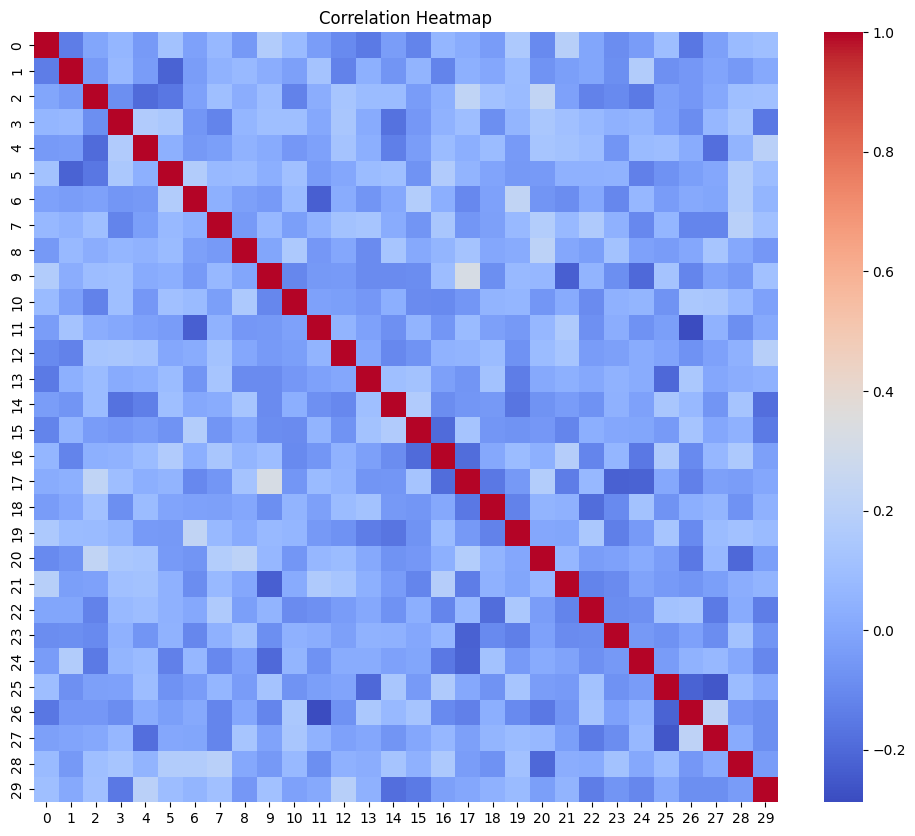


Columns with correlation <=0.7: []


In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

low_corr_cols = corr_matrix.columns[(corr_matrix.abs() <= 0.7).all()]
print("\nColumns with correlation <=0.7:", list(low_corr_cols))

In [20]:
data_normalized = (data - data.min()) / (data.max() - data.min()) * 10
print("\nNormalized values sample:\n", data_normalized.head(3))


Normalized values sample:
          0         1         2         3         4         5         6   \
0  5.532995  6.616162  6.758423  4.696970  4.720812  3.112245  5.226131   
1  6.192893  8.939394  6.758423  8.434343  9.035533  0.153061  4.723618   
2  6.399947  3.989899  9.623656  5.734488  6.035046  6.734694  3.417085   

          7         8         9   ...        20        21        22        23  \
0  10.000000  5.487179  4.321608  ...  9.191919  4.329897  6.125654  7.185930   
1   5.757576  4.923077  8.693467  ...  4.191919  5.830315  5.963566  6.612046   
2   6.337286  9.641026  4.422111  ...  7.979798  9.278351  5.963566  7.386935   

         24        25        26        27        28        29  
0  5.776327  9.000000  3.092784  6.046410  6.632653  8.434343  
1  4.873096  8.421053  9.742268  4.111675  6.381688  6.400966  
2  3.096447  9.368421  6.752577  9.898477  6.381688  6.400966  

[3 rows x 30 columns]


In [21]:
data_binary = data_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)
print("\nBinary values sample:\n", data_binary.head(3))


Binary values sample:
    0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   27  28  29  
0   0   0   0  
1   0   0   0  
2   0   0   0  

[3 rows x 30 columns]


<ipython-input-21-3111024953>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_binary = data_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


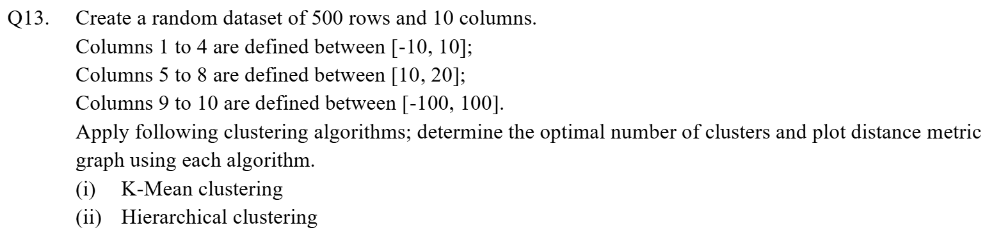

In [22]:
data = np.zeros((500,10))
data[:, :4] = np.random.uniform(-10, 10, size = (500,4))
data[:,4:8] = np.random.uniform(10, 20, size = (500,4))
data[:, 8:] = np.random.uniform(-100, 100, size = (500,2))
data

array([[  4.38812562,   9.76421682,   7.37134444, ...,  14.19193323,
         77.61312215, -29.05160182],
       [  5.2927369 ,   0.24320588,   1.01758855, ...,  16.02893987,
         46.30688727,  88.30682695],
       [ -1.08138493,  -7.04680306,   9.18644481, ...,  14.45168144,
         32.29618882,  80.50370716],
       ...,
       [  8.55222513,   6.86305072,   3.93204114, ...,  15.29582596,
         28.81435998,  12.40267099],
       [  8.82329263,  -7.33112292,  -7.49972469, ...,  19.00692785,
        -86.38247955, -81.35571995],
       [  1.09110967,   7.15867705,  -7.85862516, ...,  19.91427132,
          6.38372032, -26.70364906]])

K-Means Clustering Analysis


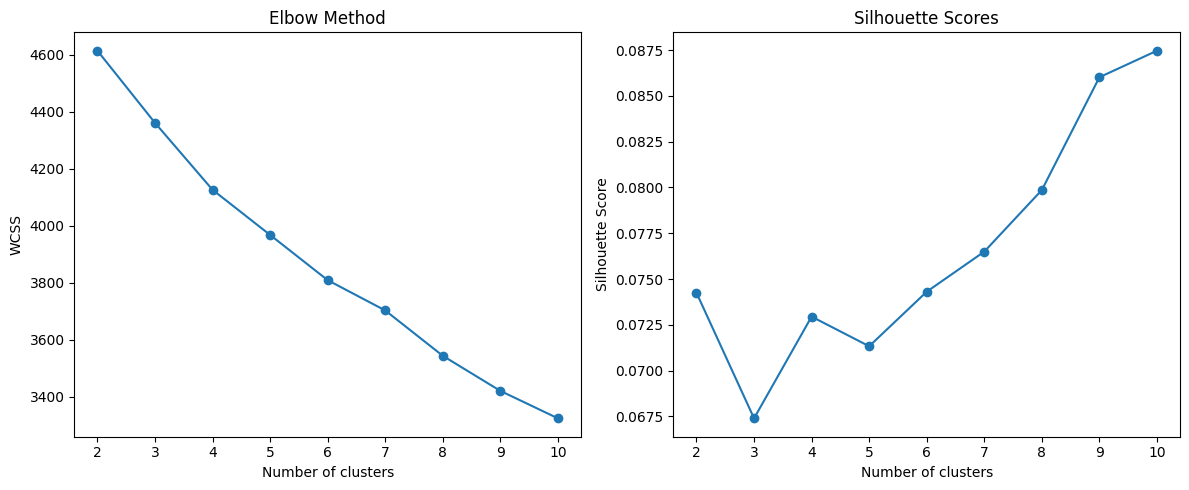

Optimal number of clusters (K-Means): 2


In [23]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

df = pd.DataFrame(data, columns=[f'Col_{i}' for i in range(1, 11)])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("K-Means Clustering Analysis")
wcss = []
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

optimal_k = np.argmin(np.diff(wcss)) + 2
print(f"Optimal number of clusters (K-Means): {optimal_k}")


Hierarchical Clustering Analysis


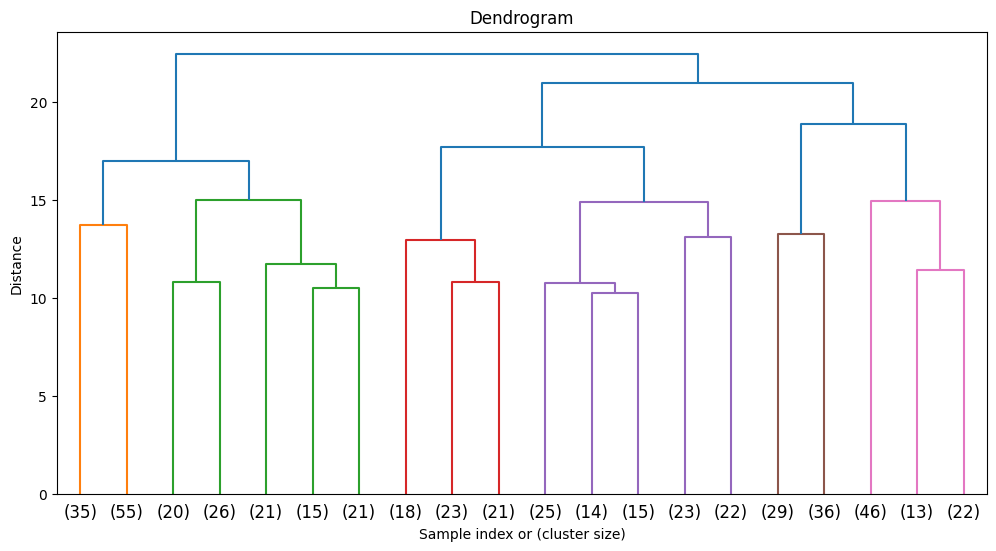

Optimal number of clusters (Hierarchical): 10


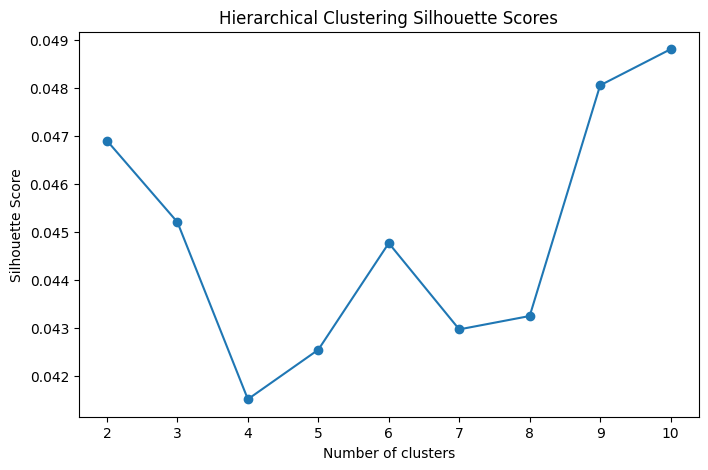

In [24]:
print("\nHierarchical Clustering Analysis")

plt.figure(figsize=(12, 6))
linked = linkage(scaled_data, method='ward')
dendrogram(linked, orientation='top', truncate_mode='lastp', p=20)
plt.title('Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

hc_silhouette = []
for k in range(2, max_clusters+1):
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(scaled_data)
    hc_silhouette.append(silhouette_score(scaled_data, hc_labels))

optimal_hc_k = np.argmax(hc_silhouette) + 2
print(f"Optimal number of clusters (Hierarchical): {optimal_hc_k}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters+1), hc_silhouette, marker='o')
plt.title('Hierarchical Clustering Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

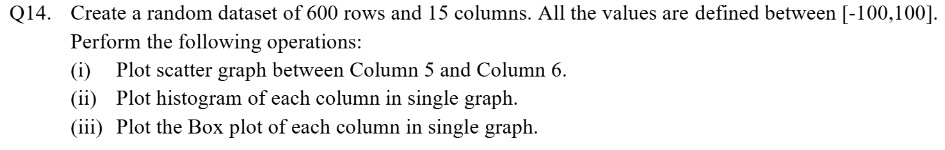

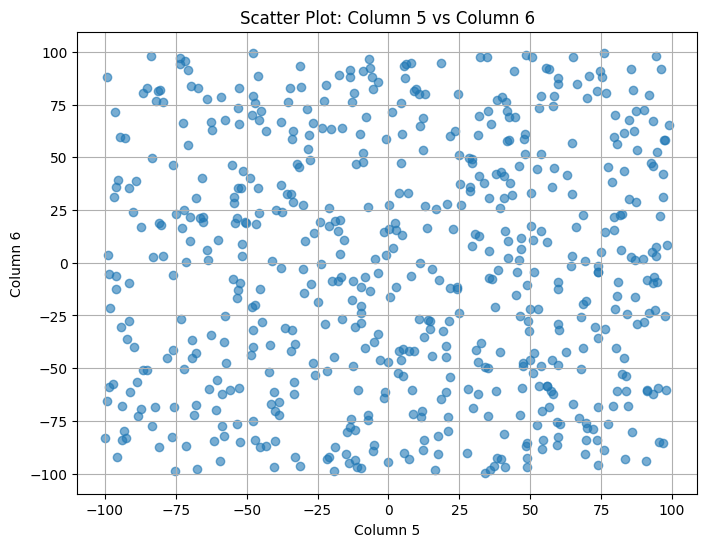

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data, columns=[f'Col_{i}' for i in range(1, 16)])

plt.figure(figsize=(8, 6))
plt.scatter(df['Col_5'], df['Col_6'], alpha=0.6)
plt.title('Scatter Plot: Column 5 vs Column 6')
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.grid(True)
plt.show()

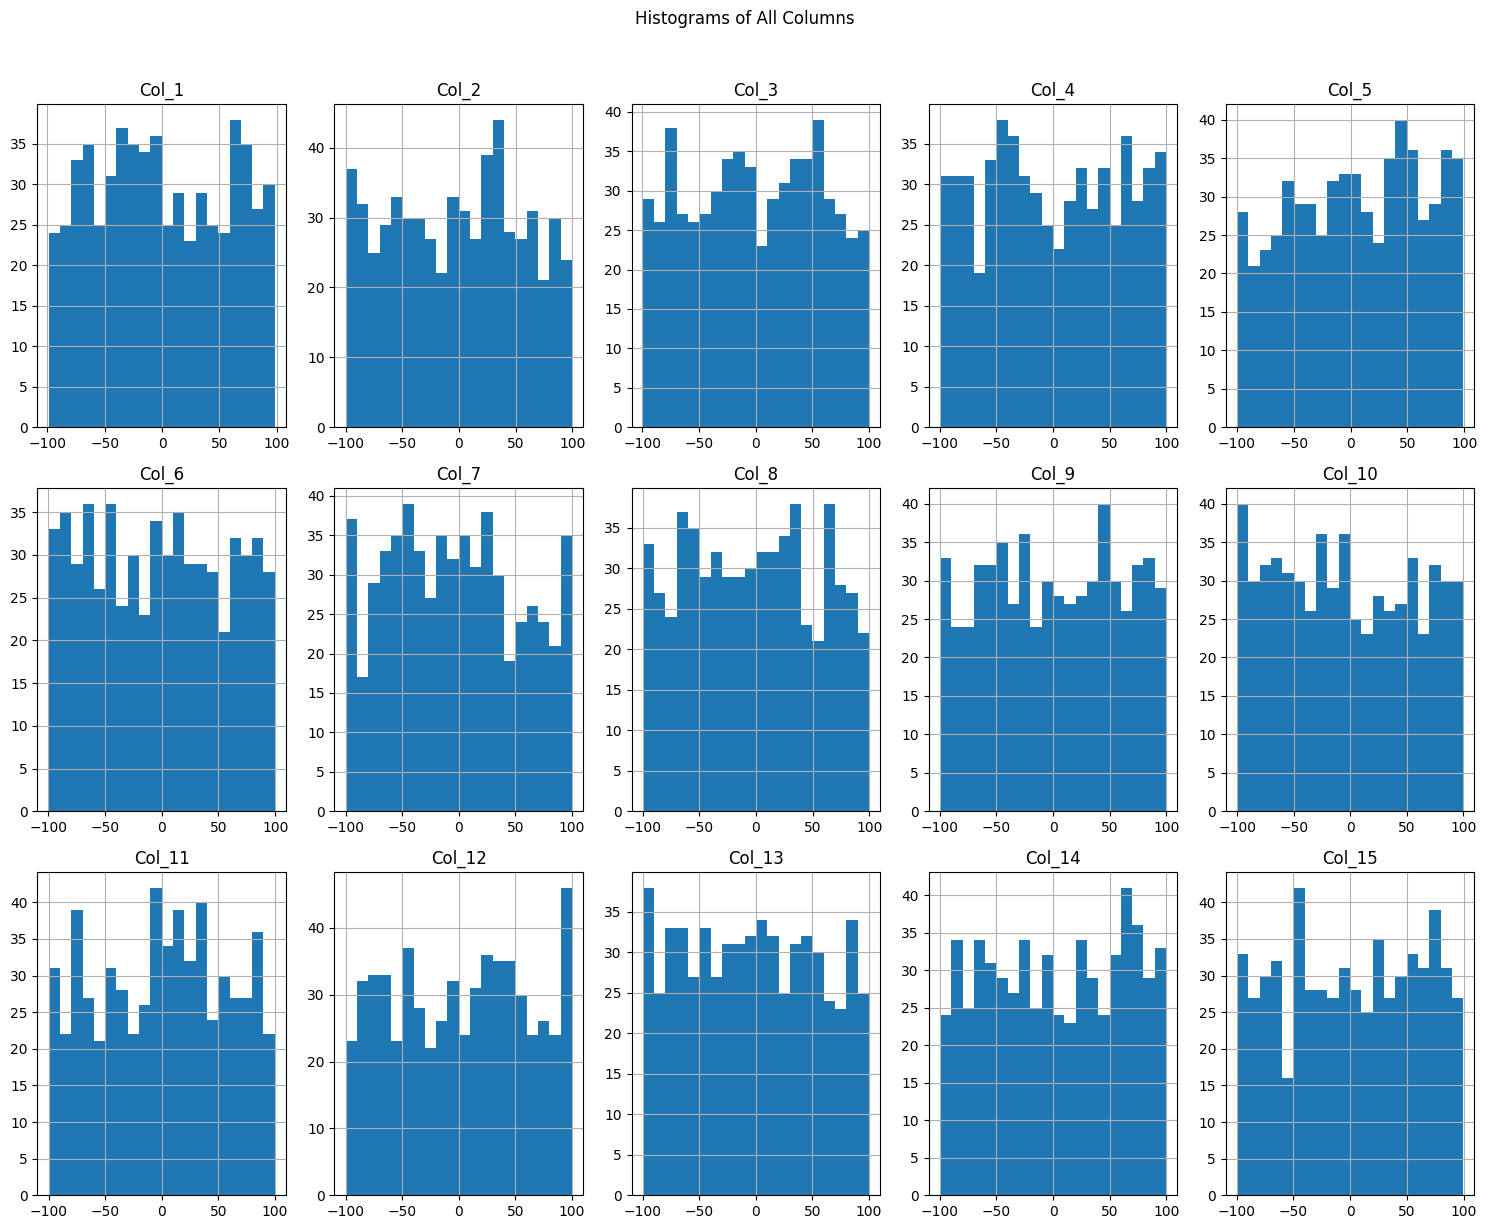

In [6]:
df.hist(figsize=(15, 12), bins=20, layout=(3, 5))
plt.suptitle('Histograms of All Columns', y=1.02)
plt.tight_layout()
plt.show()

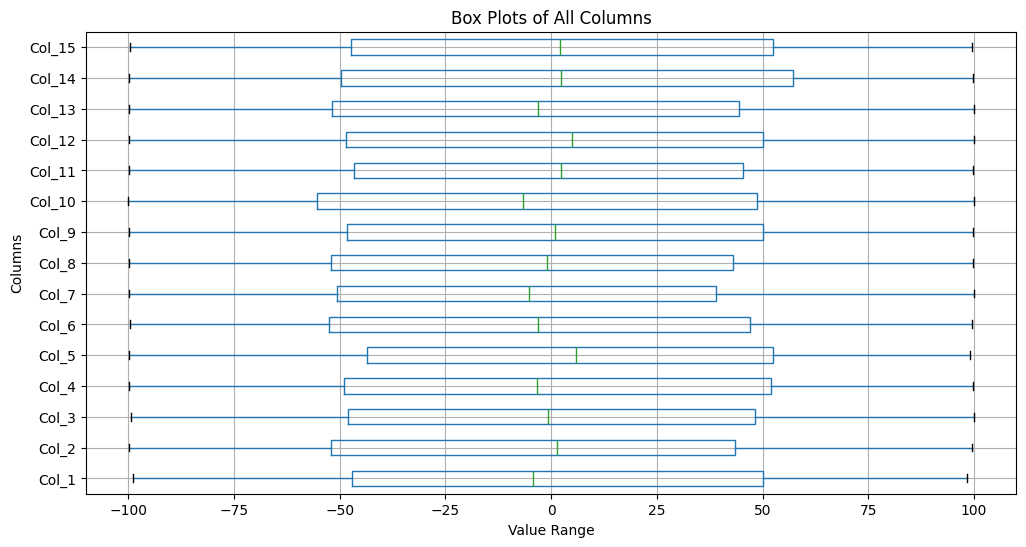

In [7]:
plt.figure(figsize=(12, 6))
df.boxplot(vert=False)
plt.title('Box Plots of All Columns')
plt.xlabel('Value Range')
plt.ylabel('Columns')
plt.grid(True)
plt.show()

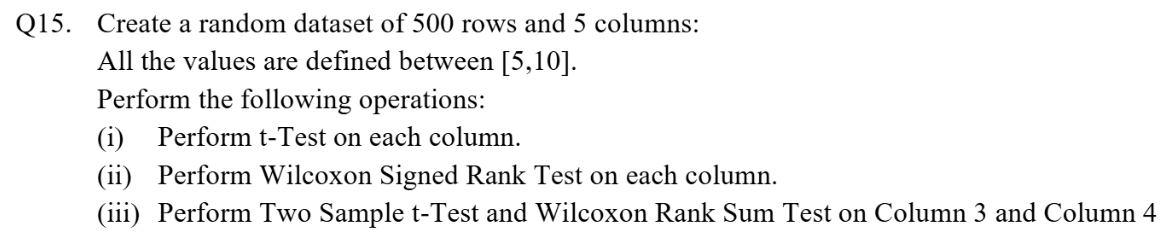

In [8]:
data = np.random.uniform(5, 10, size=(500, 5))
from scipy import stats

data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'Col_{i}' for i in range(1, 6)])

In [9]:
print("One-sample t-test results (vs μ=7.5):")
for col in df.columns:
    t_stat, p_val = stats.ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

One-sample t-test results (vs μ=7.5):
Col_1: t-statistic = 1.0918, p-value = 0.2754
Col_2: t-statistic = -0.2202, p-value = 0.8258
Col_3: t-statistic = 0.7749, p-value = 0.4387
Col_4: t-statistic = 2.2818, p-value = 0.0229
Col_5: t-statistic = -1.1251, p-value = 0.2611


In [10]:
print("\nWilcoxon signed-rank test results (vs median=7.5):")
for col in df.columns:
    stat, p_val = stats.wilcoxon(df[col] - 7.5)
    print(f"{col}: statistic = {stat:.4f}, p-value = {p_val:.4f}")


Wilcoxon signed-rank test results (vs median=7.5):
Col_1: statistic = 59040.0000, p-value = 0.2674
Col_2: statistic = 61902.0000, p-value = 0.8230
Col_3: statistic = 60125.0000, p-value = 0.4393
Col_4: statistic = 55301.0000, p-value = 0.0235
Col_5: statistic = 59059.0000, p-value = 0.2699


In [12]:
print("\nTwo-sample tests between Col_3 and Col_4:")
t_stat, p_val = stats.ttest_ind(df['Col_3'], df['Col_4'])
print(f"Independent t-test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
stat, p_val = stats.mannwhitneyu(df['Col_3'], df['Col_4'])
print(f"Wilcoxon rank-sum test: statistic = {stat:.4f}, p-value = {p_val:.4f}")


Two-sample tests between Col_3 and Col_4:
Independent t-test: t-statistic = -1.0726, p-value = 0.2837
Wilcoxon rank-sum test: statistic = 120114.0000, p-value = 0.2847
